#### Model Paths of S and B
Inputs:
- S0: starting stock price
- B0: starting bond price
- mu: drift
- sigma: volatility
- r: interest rate
- T: horizon
- N: number of steps (dt = T/N)

#### TODO: Don't forget to read text file 

In [2]:
import numpy as np
import pandas as pd

### 6.1c

In [21]:
M = 1
T = 1
N = 100
#
S0 = 1
B0 = 1
mu = 0.1
sigma = 0.2
r = 0.03
p = -2
#
dt = T/N



In [40]:
# normally distributed random variable with mu=0

np.random.seed(42)  # Use any integer as the seed value

### STOCK ###
log_S = np.zeros(N+1)
log_dS = np.zeros(N+1)
S = np.zeros(N+1)
dS = np.zeros(N+1)
# Bond
B = np.zeros(N+1)
dB = np.zeros(N+1)
# Claim Value
X = np.zeros(N+1)
delta = np.zeros(N+1)
V = np.zeros(N+1)

# starting values
S[0] = S0
log_S[0] = np.log(S0)
B[0] = B0

X[0] = np.exp(-1 * r * T) * S0 ** p
V[0] = np.exp(-1 * r * T) * S0 ** p
delta[0] = p * np.exp(-1 * r * T) * S0 ** (p-1)

for i in range(1, N+1):
    t = dt*(i)
    z = np.random.normal(loc=0, scale=1)
    # Stock
    log_dS[i] = (mu - 1/2 * (sigma**2))*dt + sigma * (dt**(1/2)) * z
    log_S[i] = log_S[i-1] + log_dS[i]
    S[i] = np.exp(log_S[i])
    dS[i] = S[i] - S[i-1]
    # Bond
    dB[i] = r*dt*B[i-1]
    B[i] = B[i-1] + dB[i]
    
    V[i] = np.exp(-1 * r * (T-t)) * (S[i] ** p)
    # 
    delta[i] = p * np.exp(-1 * r * (T-t)) * (S[i] ** (p-1))
    X[i] = X[i-1] + delta[i] * dS[i] + (X[i-1] - delta[i-1] * S[i-1]) * (1/B[i-1]) * dB[i]    

<Axes: >

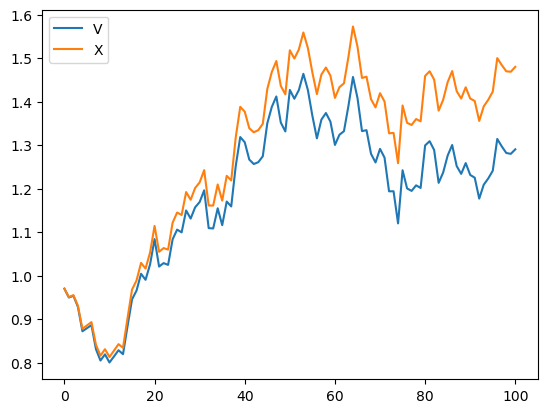

In [41]:
pd.DataFrame({'V': V, 'X': X}).plot(kind='line')

<Axes: >

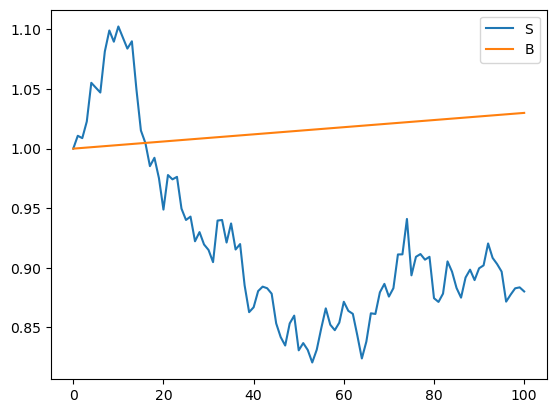

In [39]:
pd.DataFrame({'S': S, 'B': B}).plot(kind='line')

### 6.1e